In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import StandardScaler,MinMaxScaler


## Load The Data

In [2]:
df = pd.read_csv("/kaggle/input/medical-insurance-price-prediction/Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df['age'].describe()

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

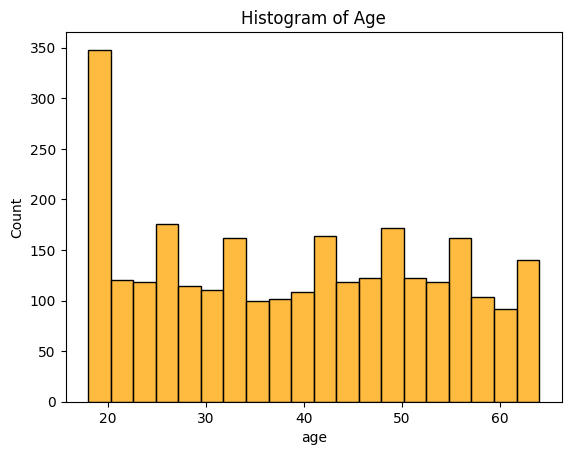

In [6]:
sns.histplot(x=df['age'],bins=20,color='Orange')
plt.title("Histogram of Age")
plt.show()

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

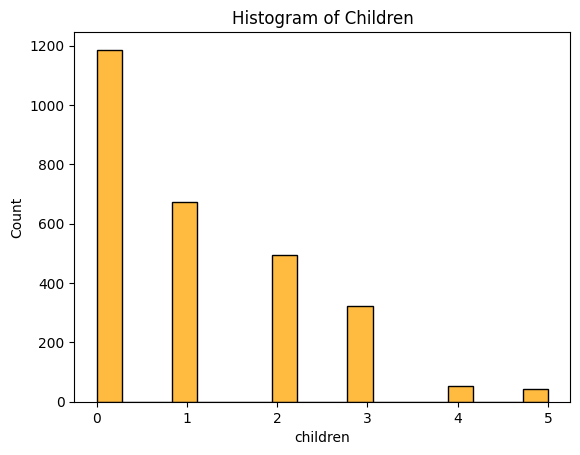

In [8]:
sns.histplot(x=df['children'],color='Orange')
plt.title("Histogram of Children")
plt.show()

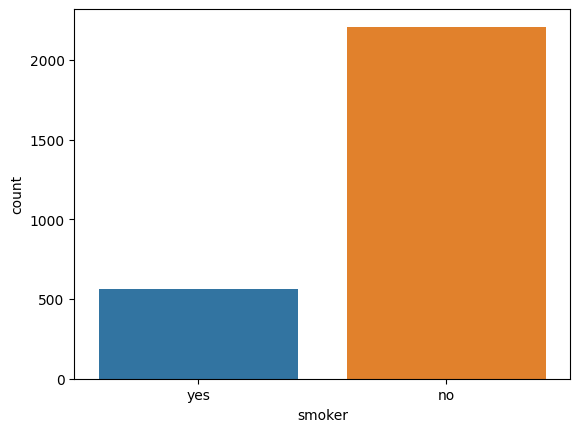

In [9]:
sns.countplot(x=df['smoker'])
plt.show()

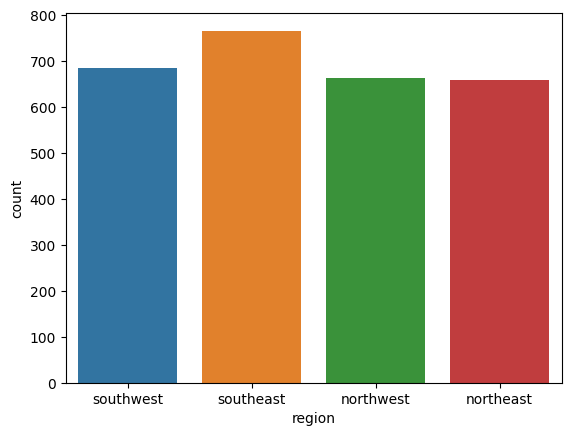

In [10]:
sns.countplot(x=df['region'])
plt.show()

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


## Handling Categorical Data

In [12]:
# sex_data = pd.get_dummies(df['sex'],prefix='Sex',dtype=int)
# smoker_data = pd.get_dummies(df['smoker'],prefix='Smoker',dtype=int)
# region_data = pd.get_dummies(df['region'],prefix='Region',dtype=int)

In [13]:
# df1 = pd.concat([df,sex_data,smoker_data,region_data],axis=1)
# df1

In [14]:
# df1 = df1.drop(['sex','region','smoker'],axis=1)
# df1

In [15]:
# df1['charges'].describe()

In [16]:
print(df['sex'].value_counts())
print('-------------------')
print(df['smoker'].value_counts())
print('-------------------')
print(df['region'].value_counts())

sex
male      1406
female    1366
Name: count, dtype: int64
-------------------
smoker
no     2208
yes     564
Name: count, dtype: int64
-------------------
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64


In [17]:
df['sex'] = df['sex'].replace({'female':0 ,'male':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df['region'] = df['region'].replace({'southeast':0,'southwest':1,
                                    'northwest':2,'northeast':3})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,8569.86180
2768,21,0,34.600,0,0,1,2020.17700
2769,19,1,26.030,1,1,2,16450.89470
2770,23,1,18.715,0,0,2,21595.38229


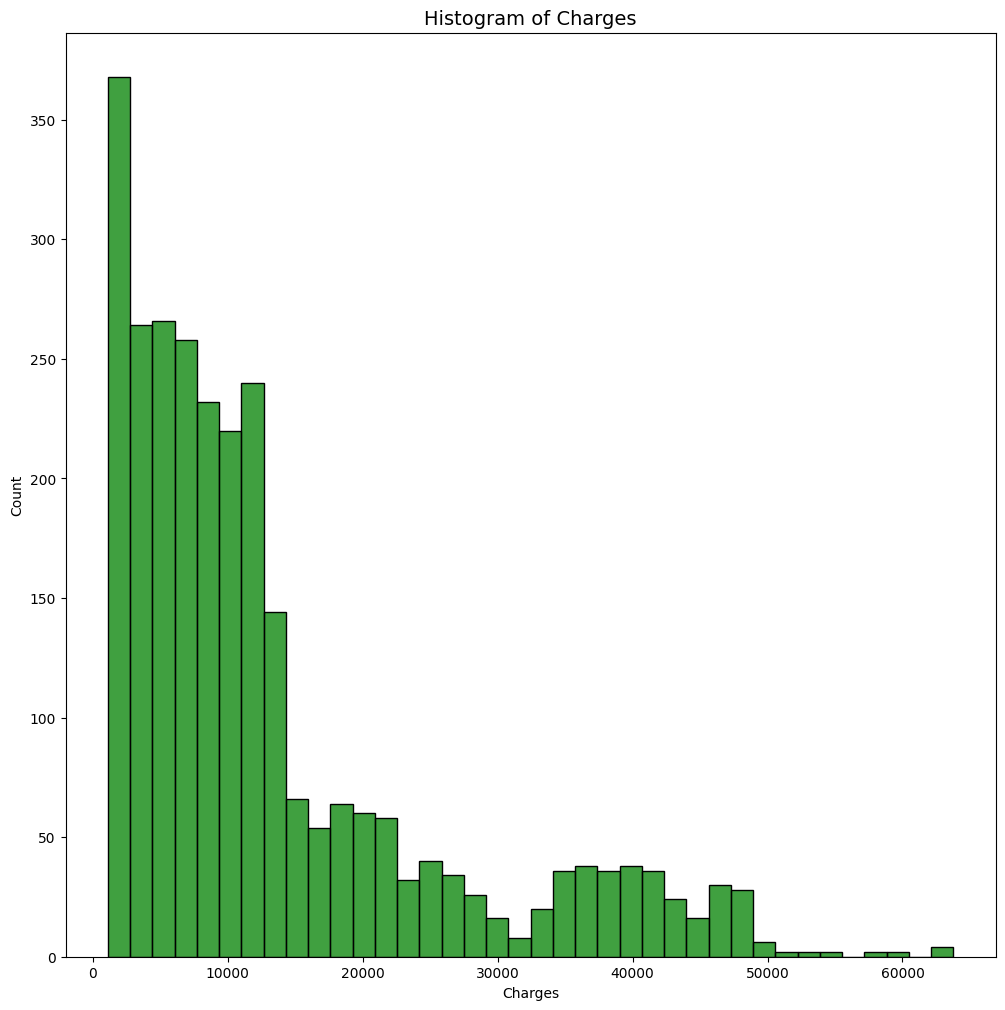

In [18]:
plt.figure(figsize=(12,12))
sns.histplot(x=df['charges'],color='Green')
plt.title('Histogram of Charges',fontsize=14)
plt.xlabel('Charges')
plt.show()

In [19]:
x = df.drop('charges',axis=1)
y = df['charges']

In [20]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0
2768,21,0,34.600,0,0,1
2769,19,1,26.030,1,1,2
2770,23,1,18.715,0,0,2


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

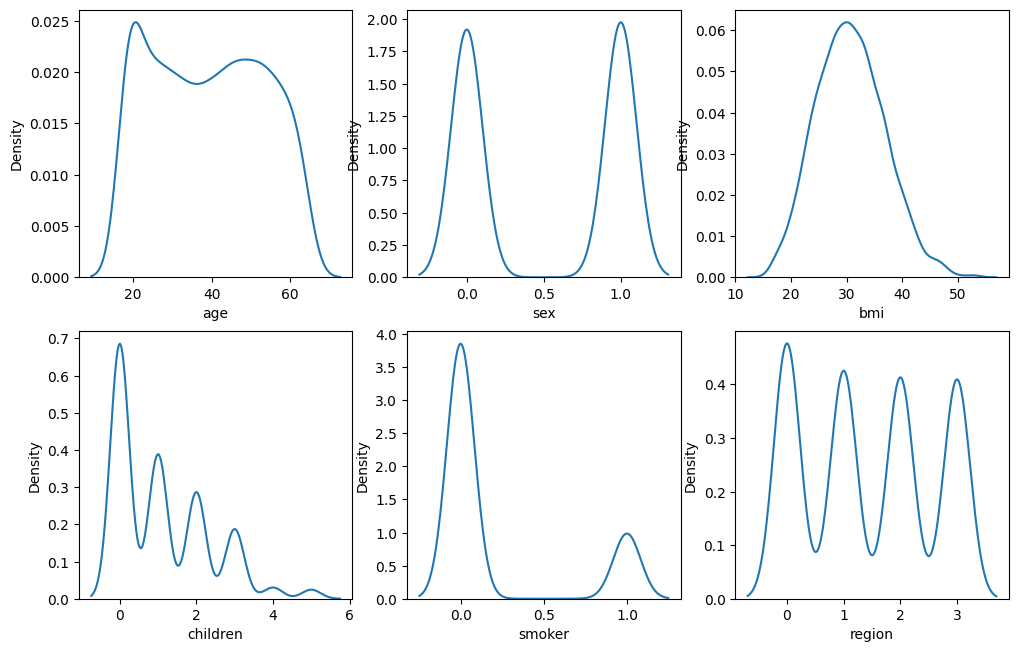

In [22]:
plt.figure(figsize=(12,16))
i=1
for col in x.columns:
    plt.subplot(4,3,i)
    sns.kdeplot(x[col])
    i+=1

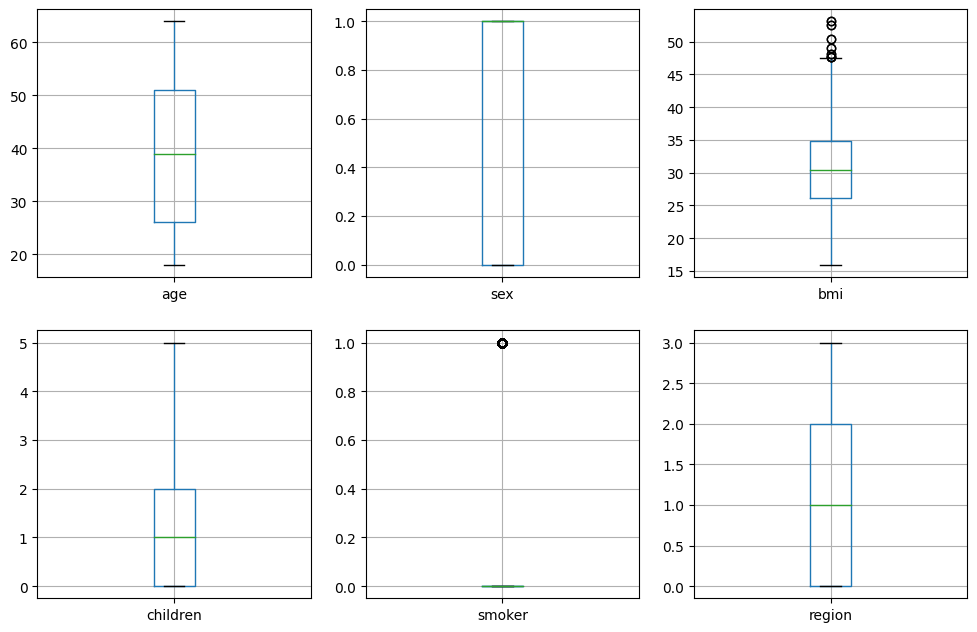

In [23]:
plt.figure(figsize=(12,16))
i=1
for col in x.columns:
    plt.subplot(4,3,i)
    x[[col]].boxplot()
    i+=1

## Split The Data

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2494, 6)
(278, 6)
(2494,)
(278,)


## Scale The Data

In [25]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [26]:
x_train_scaled = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
x_train_scaled

,age,sex,bmi,children,smoker,region
0,0.478261,1.0,0.360371,0.2,0.0,0.666667
1,0.282609,0.0,0.155905,0.0,0.0,0.666667
2,0.456522,1.0,0.276029,0.2,0.0,0.666667
3,0.000000,1.0,0.467312,0.0,0.0,0.000000
4,0.586957,0.0,0.391041,0.2,1.0,0.666667
...,...,...,...,...,...,...
2489,0.391304,1.0,0.311811,0.6,0.0,1.000000
2490,0.847826,1.0,0.350148,0.0,1.0,1.000000
2491,0.282609,0.0,0.205542,0.4,0.0,0.333333
2492,0.173913,0.0,0.168684,0.0,0.0,0.666667


In [27]:
x_test_scaled

,age,sex,bmi,children,smoker,region
0,0.021739,1.0,0.564837,0.0,1.0,0.666667
1,0.978261,0.0,0.562012,0.0,0.0,0.000000
2,0.195652,0.0,0.388485,0.6,0.0,0.666667
3,0.978261,1.0,0.461125,0.0,0.0,0.333333
4,0.652174,1.0,0.439602,0.2,0.0,0.666667
...,...,...,...,...,...,...
273,0.282609,0.0,0.353511,0.0,0.0,0.333333
274,0.956522,1.0,0.378262,0.0,0.0,0.666667
275,0.000000,1.0,0.727737,0.0,0.0,0.000000
276,0.021739,1.0,0.247915,0.0,0.0,0.666667


## Build Model

## LinearRegression

In [28]:
lg_model = LinearRegression()
lg_model.fit(x_train_scaled,y_train)

LinearRegression()

In [29]:
y_pred = lg_model.predict(x_test_scaled)
y_pred[:5]

array([28947.85309374, 15507.5819894 ,  6228.09613885, 14711.2192342 ,
       11408.63004793])

In [30]:
print(f"Accuracy on Test Data: {r2_score(y_test,y_pred)*100:.2f}")

Accuracy on Test Data: 77.02


## Random Forest Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
y_pred = rf_model.predict(x_test)

print(f"Accuracy on Test Data: {r2_score(y_test,y_pred)*100:.2f}")

Accuracy on Test Data: 97.61


## XGBoost Model

In [34]:
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = xg_model.predict(x_test)
print(f"Accuracy on Test Data: {r2_score(y_test,y_pred)*100:.2f}")

Accuracy on Test Data: 98.78


In [36]:
y_test.values[:10]

array([36219.40545, 13887.9685 , 18804.7524 , 13393.756  ,  8765.249  ,
       47928.03   , 40932.4295 ,  9264.797  ,  9144.565  ,  4296.2712 ])

In [37]:
y_pred[:10]

array([36683.19  , 13856.509 , 14582.951 , 13752.614 ,  9260.573 ,
       47765.48  , 42346.53  ,  9174.149 , 10394.078 ,  4303.4243],
      dtype=float32)

In [38]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [39]:
y_pred = rf_model.predict(x_test)
y_pred[:10]

array([36479.8554514, 13859.376391 , 12985.1838428, 13505.138918 ,
        9807.8645991, 48003.8117893, 41650.317462 ,  9175.5444055,
        9675.5500629,  4600.1652795])

In [40]:
y_test.values[:10]

array([36219.40545, 13887.9685 , 18804.7524 , 13393.756  ,  8765.249  ,
       47928.03   , 40932.4295 ,  9264.797  ,  9144.565  ,  4296.2712 ])

In [41]:
import pickle 
import json

In [42]:
with open('model.pickle','wb') as file:
    pickle.dump(xg_model,file)

In [43]:
json_data = {'sex':{'Female':0 ,'Male':1}, 'smoker':{'No':0, 'Yes':1},
'region':{'Southeast':0, 'Southwest':1, 'Northwest':2, 'Northeast':3}
}

In [44]:
json_data['sex']['Male']

1

In [45]:
json_data['region']['Southeast']

0

In [46]:
len(json_data)

3

In [47]:
with open('json_data.json','w') as file:
    json.dump(json_data, file)